## Polynomial Regrssion

In [1]:
# importing all liabraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# path of csv file
global _path
_path = os.path.dirname(os.getcwd()) + '/No Null/no-null-horse-details.csv'
_path

'/Users/pan/Desktop/proj/MLHD/No Null/no-null-horse-details.csv'

In [2]:
# now load the dataset using pandas dataframe
hd = pd.read_csv(_path)
hd

,Unnamed: 0,Serial no.,Horse id,Horse-Gender,Horse-Height,Horse-Weight,Racer-Horse
0,3,4,H4,M,51.0,409.0,Yes
1,8,9,H9,F,46.0,389.0,Yes
2,9,10,H10,M,63.0,731.0,No
3,22,23,H23,M,72.0,1181.0,No
4,26,27,H27,F,60.0,607.0,No
...,...,...,...,...,...,...,...
42858,99985,99986,H99986,F,47.0,386.0,No
42859,99986,99987,H99987,F,52.0,444.0,No
42860,99988,99989,H99989,F,60.0,664.0,Yes
42861,99994,99995,H99995,F,64.0,811.0,No


In [3]:
# now extracting independent and dependent variable
X = hd.iloc[:, 4:5].values  # height
print(X)
y = hd.iloc[:, 5:6].values  # weight
y

[[51.]
 [46.]
 [63.]
 ...
 [60.]
 [64.]
 [63.]]


array([[409.],
       [389.],
       [731.],
       ...,
       [664.],
       [811.],
       [785.]])

In [4]:
# now we want to split our dataset in train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=1)

<AxesSubplot:xlabel='Horse-Height', ylabel='Horse-Weight'>

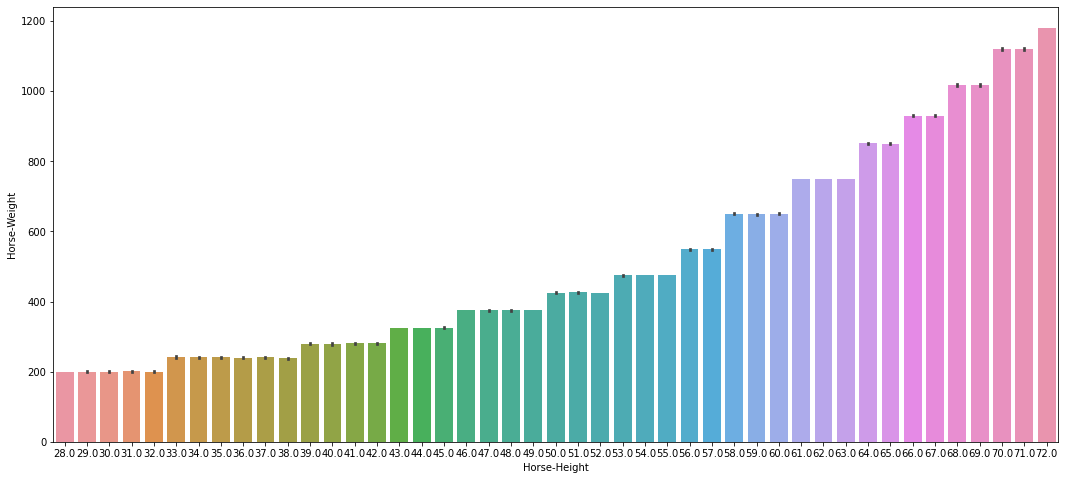

In [5]:
# display the horse data
plt.subplots(figsize=(18, 8))
sns.barplot(x='Horse-Height', y='Horse-Weight', data=hd)

In [6]:
# Now fit the linear regression model 
from sklearn.linear_model import LinearRegression

# train our model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

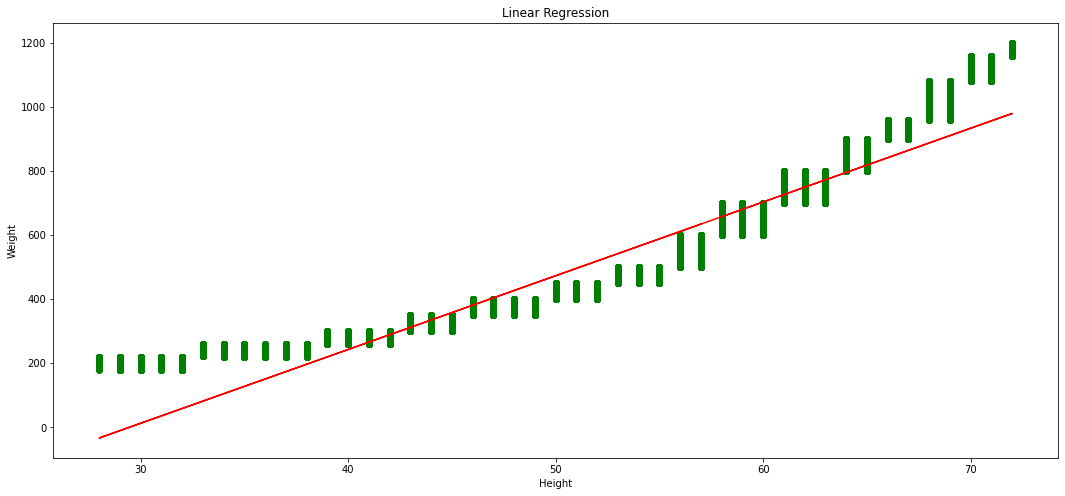

In [7]:
# now plot the data and model
plt.subplots(figsize=(18, 8))
plt.scatter(X_train, y_train, color='green')
plt.title('Linear Regression')
plt.xlabel('Height')
plt.ylabel('Weight')

# now plot the model
plt.plot(X_train, lin_model.predict(X_train), color='red')

In [8]:
# implementing Polynomial regression
from sklearn.preprocessing import PolynomialFeatures

# now create the polynomial model(on training)
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X_train)


''' X_poly denotes the value of y
y = a0 + a1.X1 + a2.x1^2 
(Quadratic equation)
'''

X_poly

array([[1.00000000e+00, 5.70000000e+01, 3.24900000e+03, ...,
        6.01692057e+08, 3.42964472e+10, 1.95489749e+12],
       [1.00000000e+00, 5.30000000e+01, 2.80900000e+03, ...,
        4.18195493e+08, 2.21643611e+10, 1.17471114e+12],
       [1.00000000e+00, 5.90000000e+01, 3.48100000e+03, ...,
        7.14924299e+08, 4.21805336e+10, 2.48865148e+12],
       ...,
       [1.00000000e+00, 6.40000000e+01, 4.09600000e+03, ...,
        1.07374182e+09, 6.87194767e+10, 4.39804651e+12],
       [1.00000000e+00, 5.60000000e+01, 3.13600000e+03, ...,
        5.50731776e+08, 3.08409795e+10, 1.72709485e+12],
       [1.00000000e+00, 5.80000000e+01, 3.36400000e+03, ...,
        6.56356768e+08, 3.80686925e+10, 2.20798417e+12]])

In [9]:
# now fit the polynomial model
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)

LinearRegression()

In [10]:
''' model is showing multiple lines 
how to resolve it???
'''
# this array represents the best point of the best fit line.
# So, the only best fit line is plotted. in other case all lines were plotted.
orders = np.argsort(X_train.ravel())

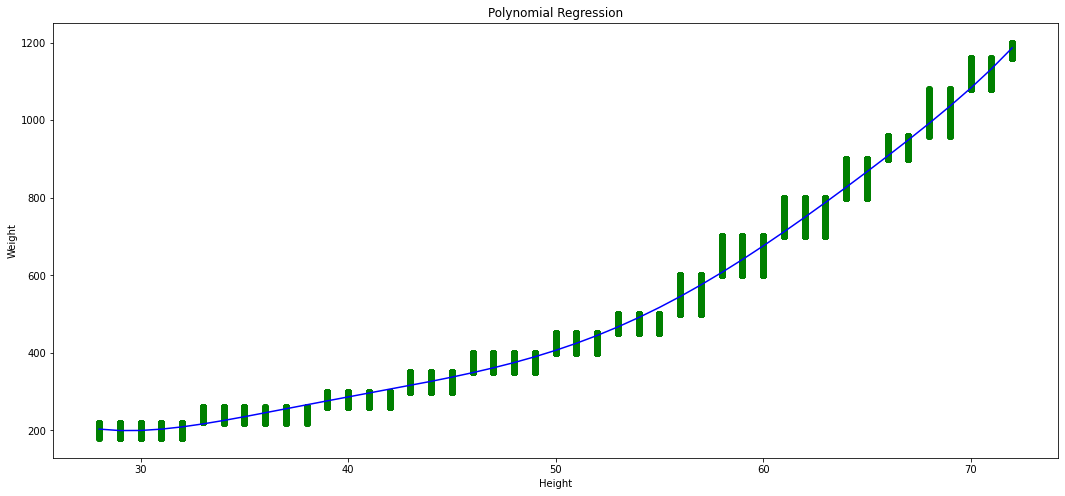

In [11]:
# now we are going to visuaize our polynomial regression model for training dataset
# now plot the data
plt.subplots(figsize=(18, 8))
plt.scatter(X_train, y_train, color='green')
plt.title('Polynomial Regression')
plt.xlabel('Height')
plt.ylabel('Weight')

# now plot the model
y_pred = poly_reg.predict(poly.fit_transform(X_train))
plt.plot(X_train[orders], y_pred[orders], color='blue')
plt.show()

In [12]:
# this array represents the best point of the best fit line.
# So, the only best fit line is plotted. in other case all lines were plotted.
orders = np.argsort(X_test.ravel())
orders

array([7404, 6754, 1704, ..., 4265, 8999, 3766])

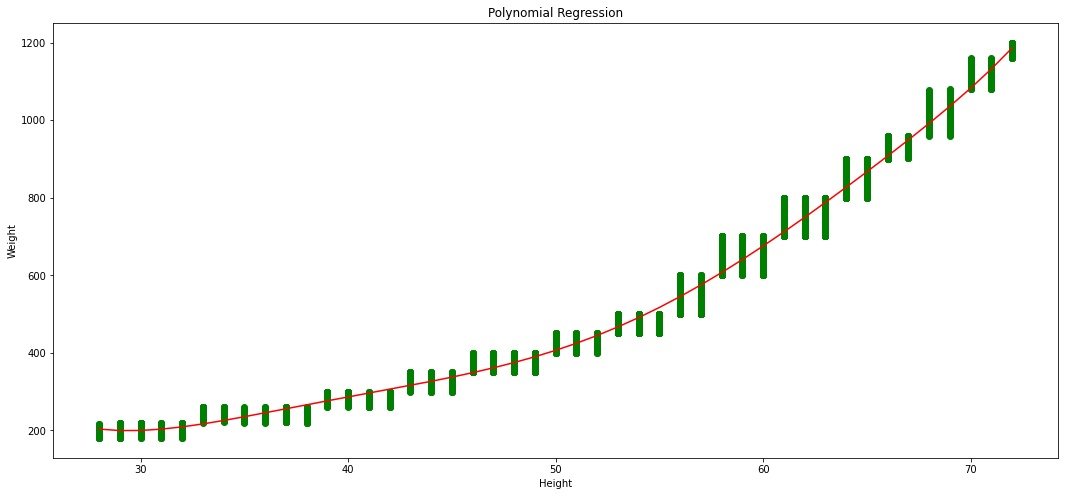

In [17]:
# now predict for test dataset
y_pred = lin_model.predict(X_test)
y_pred = poly_reg.predict(poly.fit_transform(X_test))

# now we are going to visuaize our polynomial regression model for training dataset
# now plot the data
plt.subplots(figsize=(18, 8))
plt.scatter(X_test, y_test, color='green')
plt.title('Polynomial Regression')
plt.xlabel('Height')
plt.ylabel('Weight')

# now plot the model
plt.plot(X_test[orders], y_pred[orders], color='red')
plt.show()

### calculating residuals

In [29]:
# now calculate the residuals for withmean
from sklearn import metrics

print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  25.865330433132627
MSE:  1096.2667933662642
RMSE:  33.10991986348297


In [19]:
''' From here we can see that 
the error is minimized.

degree | RMSE
    06 | 33.141858294346775
    12 | 33.14457023713048
    05 | 33.32294011660896
    07 | 33.10991986348297  --> minimum error
    08 | 33.11390017530796
    02 | 34.98362421556123
    19 | 33.51950448602919
 '''

' From here we can see that \nthe error is minimized.\n\ndegree | RMSE\n    06 | 33.141858294346775\n    12 | 33.14457023713048\n    05 | 33.32294011660896\n    07 | 33.10991986348297  --> minimum error\n    08 | 33.11390017530796\n    02 | 34.98362421556123\n    19 | 33.51950448602919\n '

In [33]:
# now calculating accuracy
accuracy = metrics.r2_score(y_pred, y_test) * 100
print('Accuracy: ', round(accuracy, 5), end='%')

Accuracy:  97.94124%